# Python Exercise : Logistic Regression

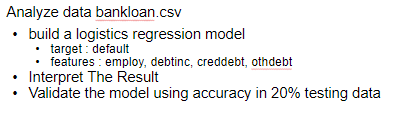

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read Data Bank Loan
df = pd.read_csv('bank_loan.csv')
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [4]:
#data informasi
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    int64  
 1   ed        700 non-null    int64  
 2   employ    700 non-null    int64  
 3   address   700 non-null    int64  
 4   income    700 non-null    int64  
 5   debtinc   700 non-null    float64
 6   creddebt  700 non-null    float64
 7   othdebt   700 non-null    float64
 8   default   700 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 49.3 KB


In [9]:
# Select Feature = 'employ', 'debtinc', 'creddebt', 'othdebt'
# Select target = 'default
column_X = ['employ', 'debtinc','creddebt','othdebt']
column_Y = ['default']

In [10]:
# Define X and y
X = df[column_X]
Y = df['default']

In [11]:
# Statistical Descriptive X Features
X.describe()

,employ,debtinc,creddebt,othdebt
count,700.000000,700.000000,700.000000,700.000000
mean,8.388571,10.260571,1.553553,3.058209
std,6.658039,6.827234,2.117197,3.287555
min,0.000000,0.400000,0.011696,0.045584
25%,3.000000,5.000000,0.369059,1.044178
50%,7.000000,8.600000,0.854869,1.987567
75%,12.000000,14.125000,1.901955,3.923065
max,31.000000,41.300000,20.561310,27.033600


> ## Modeling

In [24]:
#import statsmodels 
import statsmodels.api as sm


In [27]:
# Create Model Logistic Regression
# Model fitting

sm_logit = sm.Logit(Y, sm.add_constant(X))
result = sm_logit.fit()


Optimization terminated successfully.
         Current function value: 0.411165
         Iterations 7


In [28]:
# Print summary
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  700
Model:                          Logit   Df Residuals:                      695
Method:                           MLE   Df Model:                            4
Date:                Sat, 01 Apr 2023   Pseudo R-squ.:                  0.2844
Time:                        13:54:59   Log-Likelihood:                -287.82
converged:                       True   LL-Null:                       -402.18
Covariance Type:            nonrobust   LLR p-value:                 2.473e-48
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2302      0.236     -5.210      0.000      -1.693      -0.767
employ        -0.2436      0.029     -8.456      0.000      -0.300      -0.187
debtinc        0.0885      0.021      4.200      0.0

> ## Collinearity

In [6]:
# Import Library VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Define function to calculate VIF
def calc_vif(X):

    # Calculating VIF
     vif = pd.DataFrame()
     vif["variables"] = X.columns
     vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

     return(vif)

In [7]:
# Use VIF function to check collinearoty variables
calc_vif

**Interpretation**
Dari perhitungan VIF, dapat kita lihat bahwa hasilnya kurang dari 5. Jadi tidak ada masalah colineraty pada


> ## Model Interpretation

In [15]:
# Employ Column
np.exp(0.2436*1)
# B1 = -0.2436 : When employment increase one year and no changes in another variable, the risk to become default most likely decrease 1.27 times

1.2758338948511923

In [19]:
#debtinc Column
np.exp(0.0885*1)
# B2 = 0.0885 : When ratio debt to income increase one and no changes in another variable, the risk to become default most likely increase 1.09 times

1.0925342526104793

In [20]:
# creddebt column
np.exp(0.5041*5)
# B3 = 0.5041 :  When creddebt increase 5$ and no changes in another variable, the risk to become default most likely increase 12.43 times

12.434812515742879

LLR-Test:
<br>
- B1, B2, B3, B$ : Memiliki P-Value dari Log-Likehoodnya kurang dari 0.05. Jadi fitu4 X yang ktia gunkan memiliki cukup bukti minimal employ, debtinc, credebt, dan otherdebt punya pengaruh yang signifikan terhadap default rate
<br>
Wald Test:
 B1, B2, B3 : Memiliki P-Value kurang dari 0.5. Artinya kita mempunyai cukup bukti bahwa employ, debtinc, credebt memiliki pengaruh yang cukup signifikan
- B4 : Memiliki P-value lebih dari 0.055. Artinya kita tidak mempunya cukup bukti bahwa otherdebt memiliki pengaruh yang signifikan terhadap default rate.

Parameter Estimate:
- B1 : -0.2436 : ketika employment akan mengurangi default rate. Ketika employment mengalami kenaikan  1 tahun , probability cutomers masuk ke dalam category default rate akan menurun sebesar 1.27 kali
- B2 : 0.005 : Ratio debit akan memberikan kenaikan terhadap default rate. Ketika ratio debt mengalami kenaikan 1, probability customer menjadi default akan naik sebesar 1.09 kali
- B3 : 0.5041 : credbr akan memberikan kenaikan default rate. Ketika crdebt mengaalami kenaikan $5 , probability customer akan naik sebesar 12.43 kali


Coefficient Determination:
<br> 
R-Square = 28.44% . Artinya model memiliki kemampuan untuk menjelaskan 28.44% variasi dari default rate.


> ## Validation

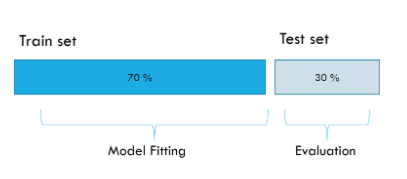

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [35]:
X.columns

Index(['employ', 'debtinc', 'creddebt', 'othdebt'], dtype='object')

In [36]:
X = (i for i in X.columns if 'othdebt' not in i)

In [71]:
X = df[X]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(
     X, 
     Y, 
     stratify = Y,
     test_size = 0.2, 
     random_state = 2020)

In [33]:
sm_logit_train = sm.Logit(y_train,sm.add_constant(X_train))
result_train = sm_logit_train.fit()

Optimization terminated successfully.
         Current function value: 0.411145
         Iterations 7


In [34]:
print(result_train.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  560
Model:                          Logit   Df Residuals:                      555
Method:                           MLE   Df Model:                            4
Date:                Sat, 01 Apr 2023   Pseudo R-squ.:                  0.2835
Time:                        14:04:31   Log-Likelihood:                -230.24
converged:                       True   LL-Null:                       -321.33
Covariance Type:            nonrobust   LLR p-value:                 2.541e-38
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2921      0.269     -4.802      0.000      -1.820      -0.765
employ        -0.2282      0.031     -7.359      0.000      -0.289      -0.167
debtinc        0.0834      0.024      3.542      0.0

In [39]:
y_predict_proba = result_train.predict(sm.add_constant(X_test))
y_predict_proba


118    0.584807
309    0.308932
339    0.308407
686    0.398796
639    0.236440
         ...   
597    0.544007
58     0.012081
467    0.102066
148    0.060111
681    0.214943
Length: 140, dtype: float64

In [41]:
y_predict_class = np.where(y_predict_proba>0.5,1,0)
y_predict_class

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0])

In [42]:
print('model accuracy in test dataset:',accuracy_score(y_test,y_predict_class))

model accuracy in test dataset: 0.8214285714285714


**Interpretation**

# Python Exercise : KNN

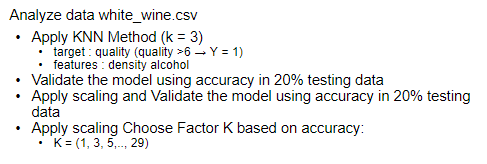

In [46]:
# Read Data White Wine
df_wine = pd.read_csv('white_wine.csv')
df_wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [47]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,519.000000,519.000000,519.000000,519.000000
mean,6.812115,0.289260,0.338327,6.624615,0.047781,37.146154,146.545192,0.995374,3.210289,0.486936,10.119461,5.805395
std,0.730447,0.106385,0.120427,5.309704,0.023006,16.915715,44.601137,0.002613,0.148275,0.101472,1.087835,0.880226
min,5.000000,0.100000,0.000000,0.800000,0.020000,3.000000,41.000000,0.989900,2.870000,0.270000,8.500000,3.000000
25%,6.300000,0.227500,0.270000,1.600000,0.038000,25.000000,113.000000,0.993400,3.110000,0.410000,9.300000,5.000000
50%,6.800000,0.270000,0.340000,5.200000,0.045000,36.000000,147.000000,0.995400,3.200000,0.480000,9.900000,6.000000
75%,7.200000,0.330000,0.400000,10.500000,0.052000,48.000000,174.250000,0.997400,3.310000,0.540000,10.700000,6.000000
max,10.200000,0.905000,0.880000,22.000000,0.346000,131.000000,313.000000,1.003300,3.720000,0.850000,12.900000,8.000000


In [45]:
# Show Data
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         520 non-null    float64
 1   volatile acidity      520 non-null    float64
 2   citric acid           520 non-null    float64
 3   residual sugar        520 non-null    float64
 4   chlorides             520 non-null    float64
 5   free sulfur dioxide   520 non-null    float64
 6   total sulfur dioxide  520 non-null    float64
 7   density               520 non-null    float64
 8   pH                    519 non-null    float64
 9   sulphates             519 non-null    float64
 10  alcohol               519 non-null    float64
 11  quality               519 non-null    float64
dtypes: float64(12)
memory usage: 48.9 KB


In [48]:
# Add label column using .where(wine['quality']>6,1,0)
df_wine['label'] = np.where(df_wine['quality'] > 6, 1, 0)
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,6.1,0.31,0.26,2.2,0.051,28.0,167.0,0.9926,3.37,0.47,10.4,6.0,0
516,6.8,0.18,0.37,1.6,0.055,47.0,154.0,0.9934,3.08,0.45,9.1,5.0,0
517,7.4,0.15,0.42,1.7,0.045,49.0,154.0,0.9920,3.00,0.60,10.4,6.0,0
518,5.9,0.13,0.28,1.9,0.050,20.0,78.0,0.9918,3.43,0.64,10.8,6.0,0


In [49]:
df_wine[df_wine['quality']>6]['quality'].value_counts()

7.0    82
8.0    16
Name: quality, dtype: int64

In [50]:
df_wine[df_wine['quality']<6]['quality'].value_counts()

5.0    167
4.0     18
3.0      4
Name: quality, dtype: int64

<AxesSubplot:xlabel='density', ylabel='alcohol'>

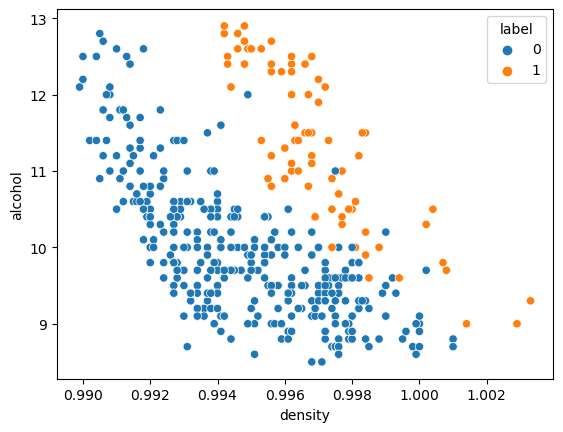

In [52]:
import seaborn as sns
sns.scatterplot(x = 'density', y = 'alcohol',data =df_wine, hue = 'label')

In [53]:
# Check missing value alcohol and density
df_wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      1
sulphates               1
alcohol                 1
quality                 1
label                   0
dtype: int64

In [55]:
# Impute missing value with mean
df_wine.fillna(df_wine['alcohol'].mean(), inplace=True)

In [56]:
# Define X = 'alcohol','density'
# Define y = 'label

X = df_wine[['alcohol', 'density']]
y = df_wine['label']


In [57]:
# Data Splitting 80% train data, 20% test data using stratify = y and random_state
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(
                                                                X,
                                                                y,
                                                                stratify = y,
                                                                test_size = 0.2,
                                                                random_state=42
                                                            )

> ## Without Scaling

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
# Define model KNN and define n_neighbors = 3
# Model Fitting (knn.fit(X_train,y_train))
# Predict Data (knn.predict(X_test))
knn = KNeighborsClassifier(n_neighbors= 3)
knn = knn.fit(X_train_wine, y_train_wine)
y_predict = knn.predict(X_test_wine)


In [73]:
Comparison = y_predict.copy()
Comparison = pd.DataFrame()
Comparison ['y_predict'] = [i for i in y_predict]
Comparison ['y_test'] = [i for i in y_test_wine]
Comparison

,y_predict,y_test
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
99,1,1
100,0,0
101,0,0
102,0,0


In [17]:
# Check akurasi model
# print('model accuracy in test dataset:',accuracy_score(y_test,y_predict_class))

> ## With Scaling

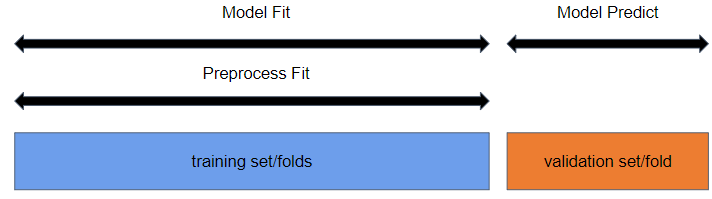

In [61]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
# Define Scaler
# Scaler fitting with train data
# Data transform .transform

scaler                   = MinMaxScaler()
scaler                   = scaler.fit(X_train_wine)
X_train_wine_scale       = scaler.transform(X_train_wine)
X_test_wine_scale        = scaler.transform(X_test_wine)

In [68]:
# Redefine knn model with n_neighbors = 3
# Model Fitting with data X_train_scaled, y_train
# KNN predict data

knn_new = KNeighborsClassifier(n_neighbors=3)
knn_new.fit(X_train_wine_scale, y_train_wine)
y_predict_new = knn_new.predict(X_test_wine)


In [69]:
print('model accuracy in test dataset:',accuracy_score(y_test,y_predict_class))

model accuracy in test dataset: 0.8214285714285714


**Interpretation**

The accuracy improved from 0.9038 to 0.9876 after we applied scaling.

> ## Choose Factor K

In [70]:
import matplotlib.pyplot as plt

In [86]:
# Create range with step 2 (1, 30, 2)
# Define empty list testing_accuracies
# Define empty list training_accuracies
# Score = 0
# Using For looping (iteration k in range defined)
  ## Define Model
  ## Model Fitting train
  ## KNN predict y_predict_training 
  ## Append accuary to list training_accuracies
  ## KNN predict y_predict_testing
  ## Append accuary to list testing_accuracies
  ## Check condition acc_score > score 
     ## score = acc_score
     ## best_k = i

k                 = range (1, 30, 2)
testing_accuracy  = []
training_accuracy = []
score             = 0

for i in k:
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train_wine_scale, y_train_wine)

    y_predict_testing = knn.predict(X_test_wine_scale)
    acc_score  = accuracy_score(y_test_wine, y_predict_testing)

    y_predict_training = knn.predict(X_train_wine_scale)

    training_accuracy.append(accuracy_score(y_train_wine, y_predict_training))
    testing_accuracy.append(acc_score)

    if (acc_score > score) & (i != 1):
        score = acc_score
        best_k = i


([<matplotlib.axis.XTick at 0x1c986cdf310>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

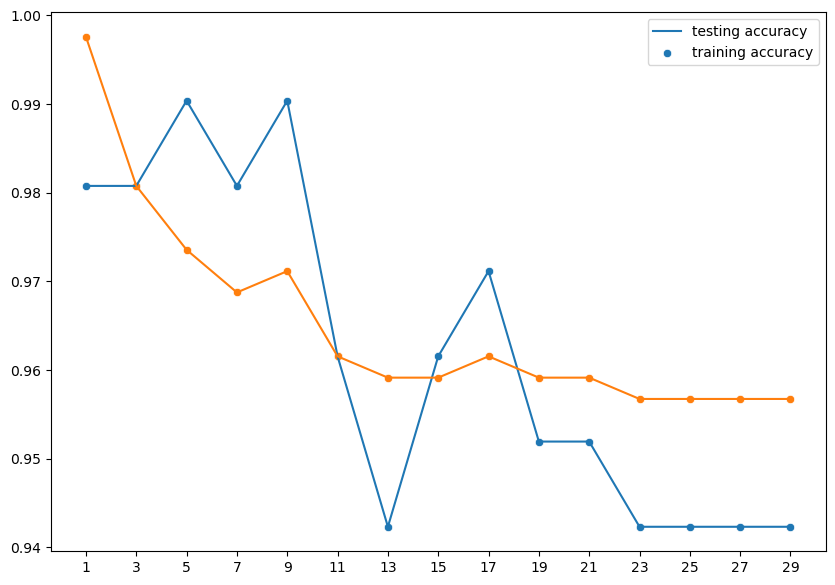

In [87]:
# Visualization accuration comparison 
plt.figure(figsize = (10,7))
sns.lineplot(k,testing_accuracy)
sns.scatterplot(k,testing_accuracy)
sns.lineplot(k,training_accuracy)
sns.scatterplot(k,training_accuracy)
plt.legend(['testing accuracy','training accuracy'])
plt.xticks(list(k))

In [88]:
# print besk k & score
print('best k:', best_k)
print('accuracy:', score)

best k: 5
accuracy: 0.9903846153846154


**Interpretation**

# Python Exercise : Decision Tree Clasiifier

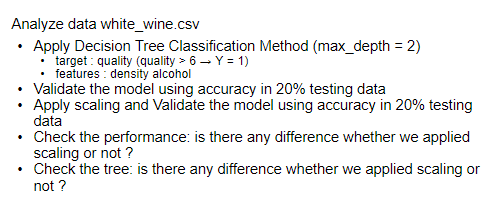

> ## Without Scaling

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [91]:
# Define model Decision Tree with criterion = 'gini', max_depth = 2
# Model Fitting using x_train default
# y_predict_class using .predict using x_train default

dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 2)
dt.fit(X_train_wine, y_train_wine)
y_predict_dt = dt.predict(X_test_wine)


In [102]:
X = ['alcohol', 'density']

In [103]:
print('model accuracy in test dataset:',accuracy_score(y_test_wine,y_predict_dt))

model accuracy in test dataset: 0.9326923076923077


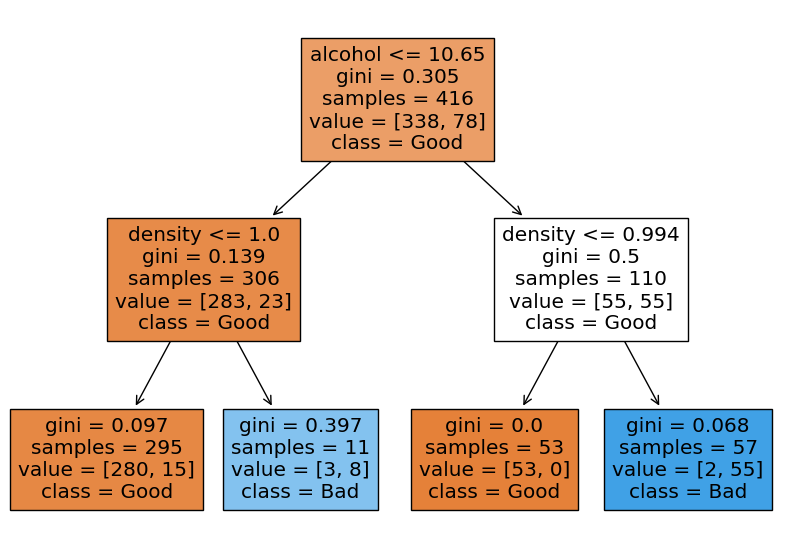

In [104]:
# Show Visualization Decision Tree
plt.figure(figsize = (10,7))
plot_tree(dt, feature_names = list(X), class_names = ['Good','Bad'], filled = True)
plt.show()

> ## With Scaling

In [106]:
# Define model Decision Tree with criterion = 'gini', max_depth = 2
# Model Fitting using x_train_scaled
# y_predict_class using .predict using x_train_scaled

dt_new = DecisionTreeClassifier(criterion = 'gini', max_depth = 2)
dt_new.fit(X_train_wine_scale, y_train_wine)
y_predict_new = dt_new.predict(X_test_wine_scale)


In [108]:
print('model accuracy in test dataset:',accuracy_score(y_test_wine,y_predict_new))

model accuracy in test dataset: 0.9326923076923077


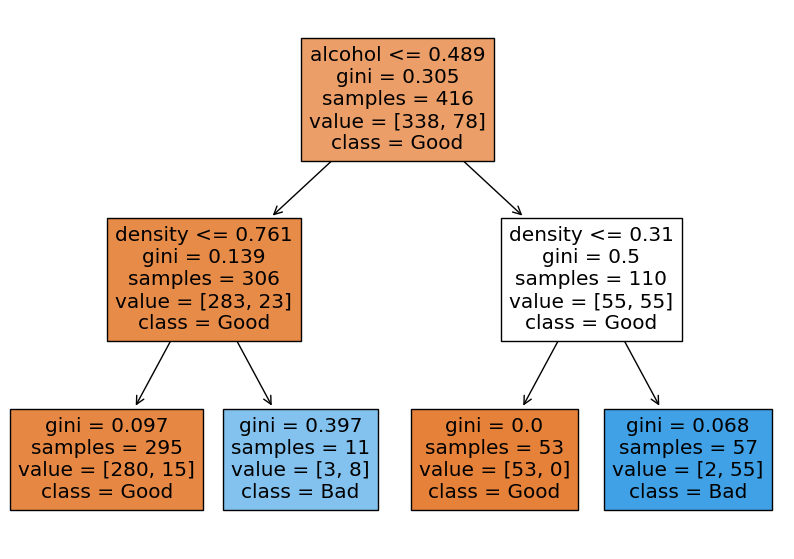

In [110]:
# Show Visualization Decision Tree
plt.figure(figsize = (10,7))
plot_tree(dt_new, feature_names = list(X), class_names = ['Good','Bad'], filled = True)
plt.show()

**Interpretation**

-Untuk model decision tree, akan lebih sulit diinterpretasikan jika menggunakan scaling. jadi best practice untuk menggunakan model decision tree bisa tnap scalling karena tidak memp